In [53]:
# Task Description: Examine the quality of the attached dataset. 
# Use ML (Python) to find insights, hidden patterns, and forecast trends; anything related to financial and risk forecasting,
# as well as ideal customer profile (ICP).

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc, ConfusionMatrixDisplay
import shap

In [105]:
plt.figure(figsize=(10, 6)) 

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [106]:
insurance = pd.read_csv(r"C:\Users\logo_\Desktop\MLE_test\insurance_data_sample.csv")

In [107]:
insurance.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Amount_paid_for_insurance,Claim amount,City
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃ‚Â Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,1665,0.0,Riga
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃ‚Â Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,1332,1900.0,Liepaja
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,1897,0.0,Riga
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,1176,0.0,Jelgava
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃ‚Â Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,1323,2450.0,Liepaja


In [108]:
# setting car_id as index
insurance.set_index('Car_id', inplace=True)

In [109]:
# renaming columns to avoid spaces
insurance = insurance.rename(columns={'Annual Income' : 'Annual_Income', 'Claim amount' : 'Claim_amount', 'Body Style' : 'Body_Style', 'Customer Name' : 'Customer_Name', 'Price ($)' : 'Price'})

In [110]:
#cheching the number of models to decide whether we can perform an analysis based on car's model or there are too many distinct models
insurance['Model'].nunique()

154

In [111]:
#merging car company and model into single object
insurance['Car'] = insurance['Company'] + ' ' + insurance['Model']

In [112]:
#ensuring we merged it correctly (seems that there is one model name used by two companies)
insurance['Car'].nunique()

155

In [63]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, C_CND_000001 to C_CND_023906
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       23906 non-null  object 
 1   Customer_Name              23905 non-null  object 
 2   Gender                     23906 non-null  object 
 3   Annual_Income              23906 non-null  int64  
 4   Dealer_Name                23906 non-null  object 
 5   Company                    23906 non-null  object 
 6   Model                      23906 non-null  object 
 7   Engine                     23906 non-null  object 
 8   Transmission               23906 non-null  object 
 9   Color                      23906 non-null  object 
 10  Price                      23906 non-null  int64  
 11  Dealer_No                  23906 non-null  object 
 12  Body_Style                 23906 non-null  object 
 13  Phone                      23906 

In [64]:
insurance.describe()

,Annual_Income,Price,Phone,Amount_paid_for_insurance,Claim_amount
count,2.390600e+04,23906.000000,2.390600e+04,23906.000000,23906.000000
mean,8.308403e+05,28090.247846,7.497741e+06,1654.517778,282.463273
std,7.200064e+05,14788.687608,8.674920e+05,753.481664,977.506527
min,1.008000e+04,1200.000000,6.000101e+06,103.000000,0.000000
25%,3.860000e+05,18001.000000,6.746495e+06,1138.000000,0.000000
50%,7.350000e+05,23000.000000,7.496198e+06,1432.000000,0.000000
75%,1.175750e+06,34000.000000,8.248146e+06,1990.000000,0.000000
max,1.120000e+07,85800.000000,8.999579e+06,4762.000000,8560.000000


In [65]:
# Check for missing values
missing_values = insurance.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
duplicates = insurance.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

# Display unique values in each column (useful for categorical features)
unique_values = insurance.nunique()
print("Unique values in each column:\n", unique_values)


Missing values in each column:
 Date                         0
Customer_Name                1
Gender                       0
Annual_Income                0
Dealer_Name                  0
Company                      0
Model                        0
Engine                       0
Transmission                 0
Color                        0
Price                        0
Dealer_No                    0
Body_Style                   0
Phone                        0
Amount_paid_for_insurance    0
Claim_amount                 0
City                         0
Car                          0
dtype: int64
Number of duplicate rows:  0
Unique values in each column:
 Date                           612
Customer_Name                 3021
Gender                           2
Annual_Income                 2508
Dealer_Name                     28
Company                         30
Model                          154
Engine                           2
Transmission                     2
Color                 

In [66]:
#####  observation: for some reason there are 28 unique dealer names and only 7 dealer_ids, meanning some dealers has the same id
#why one name is missing? Maybe, it was deleted on purpose. Let's investigate. Also, some clients have the same phone. Will check it too.

In [67]:
# Find observations with a null value for customer name. Nothing intresting, wasn't claimed, paid for insurance.
null_customer_name = insurance[insurance['Customer_Name'].isnull()]
null_customer_name

,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Amount_paid_for_insurance,Claim_amount,City,Car
Car_id,,,,,,,,,,,,,,,,,,
C_CND_007565,11/05/2022,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÃ‚Â Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,2638,0.0,Liepaja,Dodge Ram Pickup


In [68]:
#seems that it's also fine, average claim is lower than in the full dataset. let's try yto find some abnormality for some of 
#duplicating numbers
duplicate_phone_numbers = insurance[insurance.duplicated('Phone', keep=False)].sort_values(by='Phone', ascending=False)

duplicate_phone_numbers['Claim_amount'].describe()

count     204.000000
mean      235.343137
std       931.521680
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6900.000000
Name: Claim_amount, dtype: float64

In [69]:
#Checking number 6955907
duplicate_phone_numbers.groupby('Phone').agg(mean_claim_amount=('Claim_amount', 'mean')).sort_values(by='mean_claim_amount').tail(5)

,mean_claim_amount
Phone,
6444805,2062.5
7954603,2150.0
8509497,2475.0
6793888,2580.0
6955907,3450.0


In [70]:
# seems that all id fine, perhaps, the same phone numbers were generated by accidient when the dataset was created
duplicate_phone_numbers[duplicate_phone_numbers['Phone'] == 6955907]

,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Amount_paid_for_insurance,Claim_amount,City,Car
Car_id,,,,,,,,,,,,,,,,,,
C_CND_019767,10/21/2023,Aden,Male,13500,Progressive Shippers Cooperative Association No,Ford,Taurus,Overhead Camshaft,Manual,Black,69001,53546-9427,SUV,6955907,3829,6900.0,Daugavpils,Ford Taurus
C_CND_009812,12/13/2022,Skyla,Male,13500,Hatfield Volkswagen,Ford,Mustang,Overhead Camshaft,Manual,Pale White,43000,99301-3882,Hatchback,6955907,2167,0.0,Liepaja,Ford Mustang


In [71]:
# making Phone a string not number
insurance['Phone'] = insurance['Phone'].astype(str)

In [72]:
### moving forward with the analyzis. Building basic histograms to examine the distribution of numeric variables

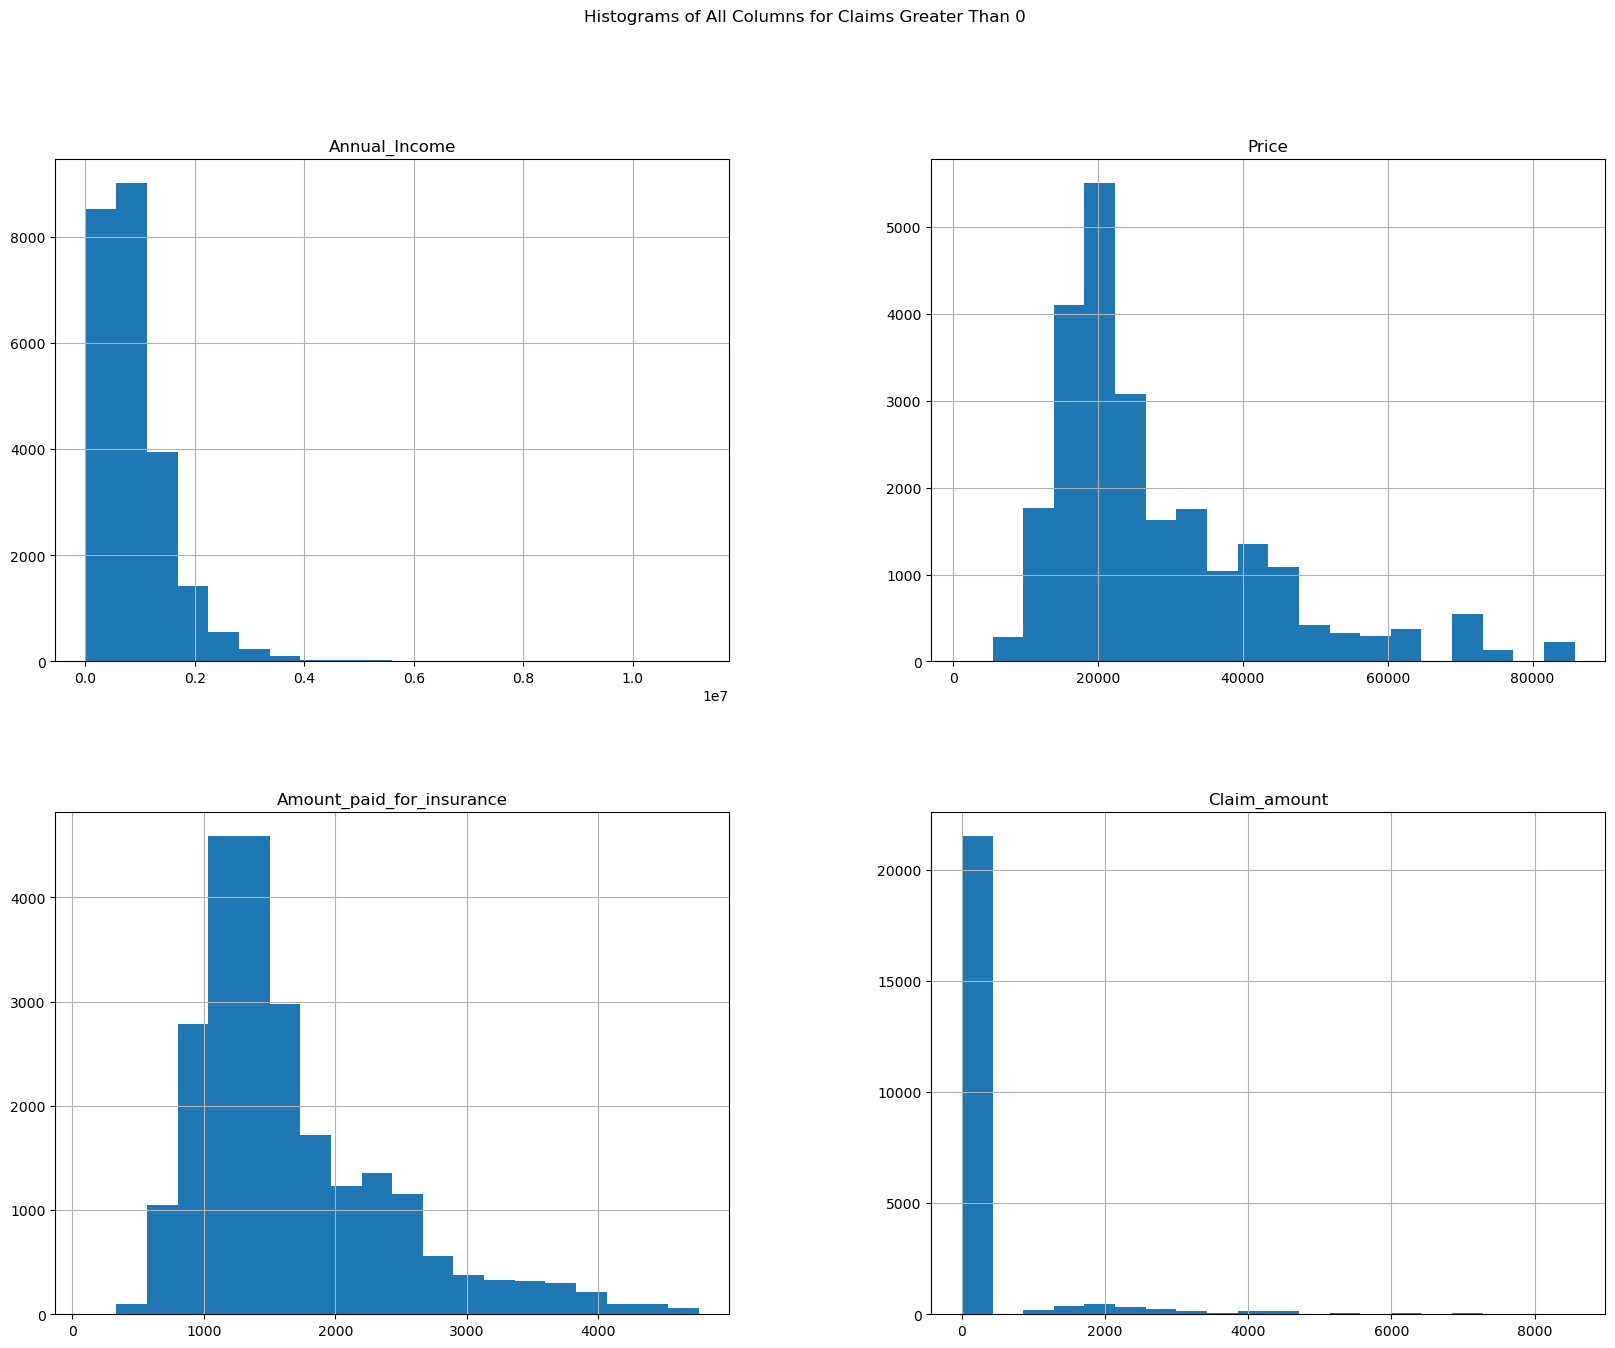

In [73]:
# Plot histograms for all numeric columns
insurance.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Columns for Claims Greater Than 0')
plt.show()

In [74]:
#intresting to look only at people who actually claimed

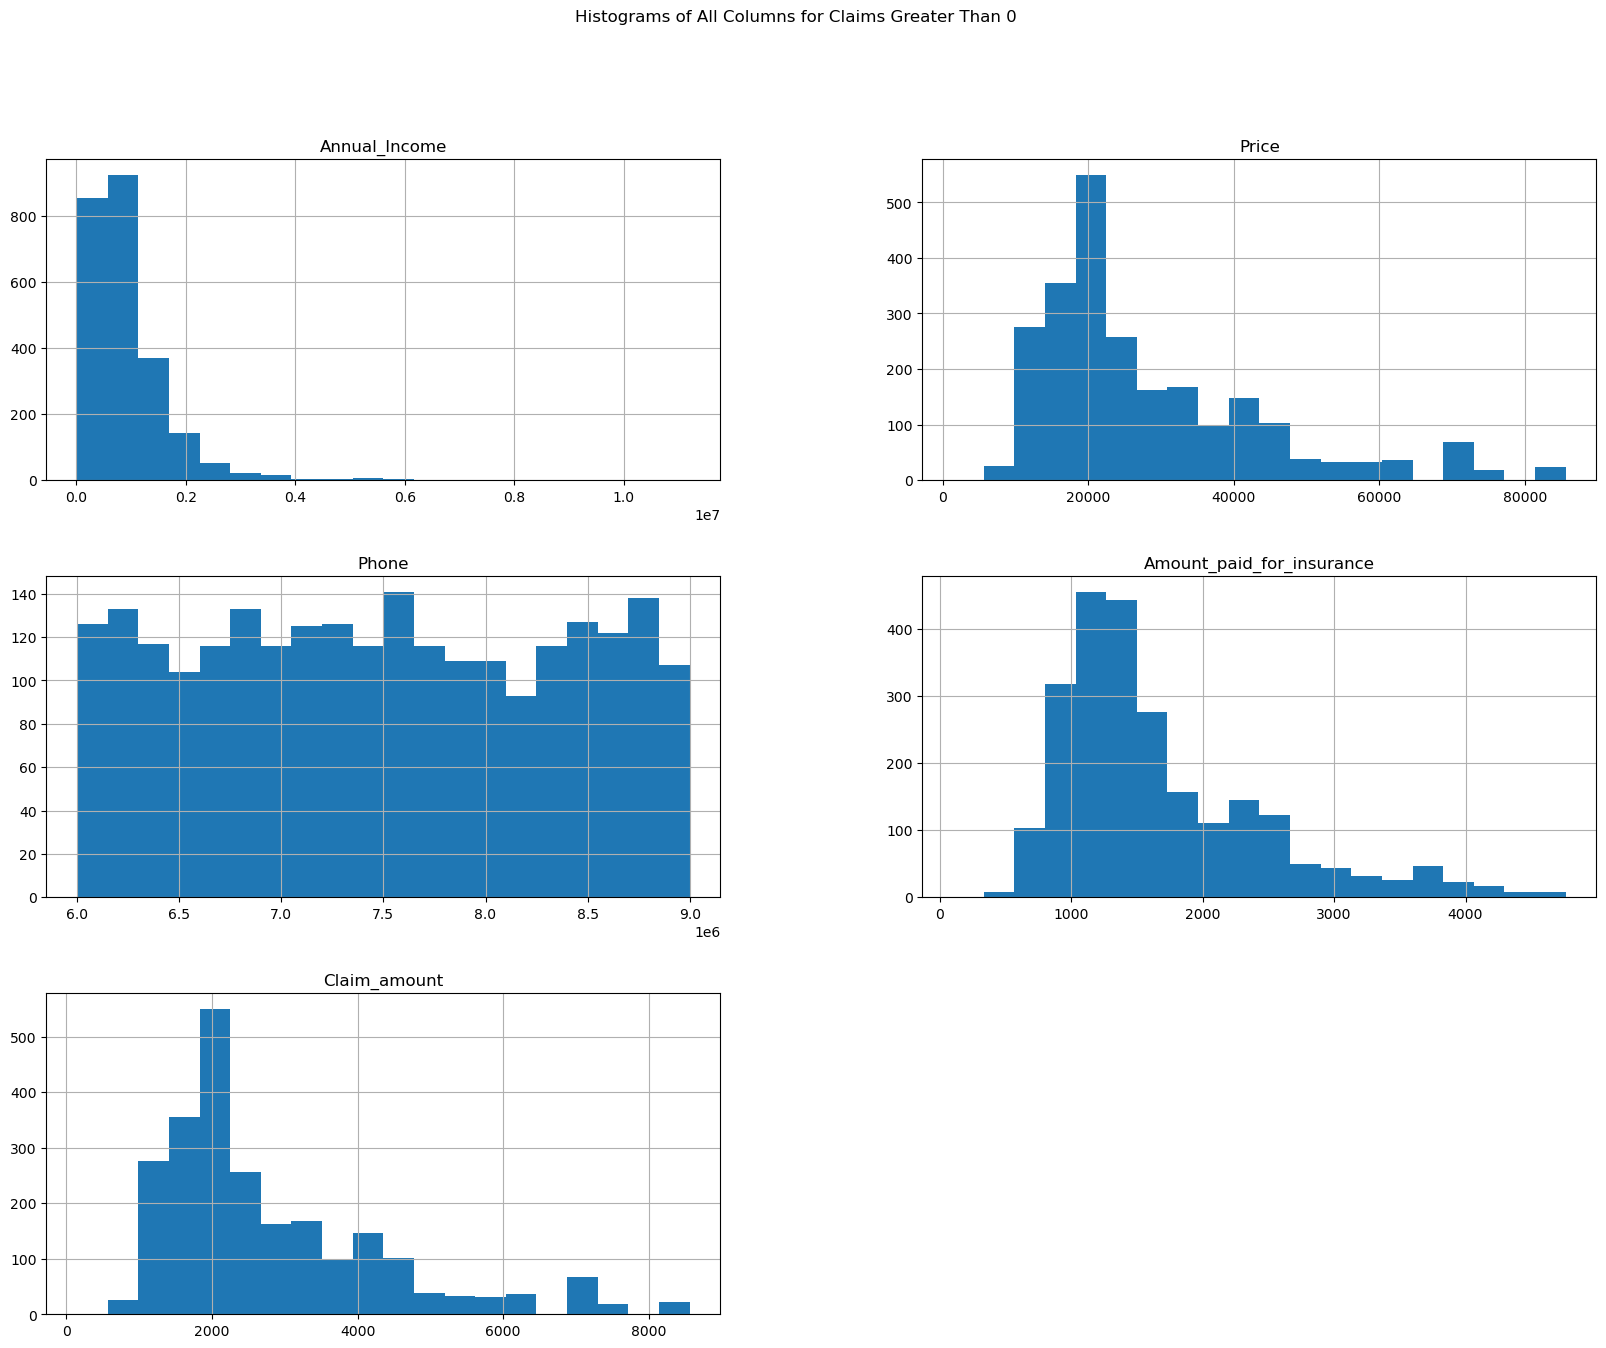

In [113]:
# Filter the DataFrame to include only rows where "Claim amount" is greater than 0
filtered_df = insurance.query('`Claim_amount` > 0')

# Plot histograms for all columns in the filtered DataFrame
filtered_df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Columns for Claims Greater Than 0')
plt.show()

In [76]:
##### 1st insight: from here we can see that claim amount in case of the accident (claim > 0) is equal to 10%
##### of the car price in all cases (further in the code it is confirmed by the scatterplot)
##### So, now we know this pattern and can  switch from regression to classification task to understand who actually claims it

C:\Users\logo_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


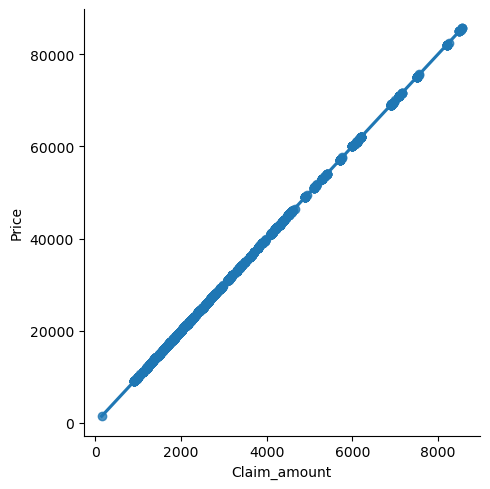

In [114]:
ax =sns.lmplot(x='Claim_amount', y ='Price', data=filtered_df, fit_reg = True)
ax.set_xlabels()

In [78]:
##### 2nd insight: distribution plots looks almost the same for the whole sample and for people who claimed the insurance
##### Perhaps, we have to look for the hidden patterns in categorical variables (Color, Engine, Dealer)

In [79]:
### transforming claim_amount into binary variable and analyze which factors affects the probability of the claim

In [115]:
# Transform 'Claim_amount' to binary: 1 if greater than 0, otherwise 0
insurance['Claim_amount'] = (insurance['Claim_amount'] > 0).astype(int)
insurance = insurance.rename(columns={'Claim_amount' : 'Claimed'})

In [163]:
# Compute the correlation matrix
insurance_cor = insurance[['Gender', 'Engine' , 'Transmission' , 'Body_Style' , 'City', 'Price', 'Amount_paid_for_insurance']]
insurance_cor = pd.get_dummies(insurance_cor)
correlation_matrix = insurance_cor.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

KeyError: "['Transmission'] not in index"

In [82]:
##### 3rd insight: manual transmission can be used obly  with  Engine and auto transmission can be used only with Double Engine
##### as these variables are perfectly correlated, we should drop one of them to avoid multicolleniarity and treat 
##### Engine as Engine & Manual Transmission and Double Engine as Double Engine & Auto Transmission

##### 4th insight: amount paid for an insurance is almost fully determined by car price (correlation 0.98), which can be
##### dangerous from the financial sytandpoint, as usually amount paid for insurance should depend on multiple factors like
#### city size, driver's experience and age, etc.

In [117]:
insurance['Engine'] = insurance['Engine'].replace({
    'DoubleÃ‚Â\xa0Overhead Camshaft': 'Double_auto',
    'Overhead Camshaft': 'Single_manual'
})

In [118]:
insurance = insurance.drop('Transmission', axis=1)

In [85]:
#going further I will start with analysis of all important variables separately and then proceed to Random Forest and Logistic
# Regression techniques 

In [86]:
# looking for some insights in the relation between claim and individual variables

In [119]:
insurance.groupby('Claimed').agg(
    mean_Price=('Price', 'mean'),
).sort_values(by='mean_Price', ascending=False)


,mean_Price
Claimed,
1,28253.664854
0,28072.095464


In [120]:
insurance.groupby('Claimed').agg(
    mean_Income=('Annual_Income', 'mean'),
).sort_values(by='mean_Income', ascending=False)

,mean_Income
Claimed,
1,839775.486192
0,829847.761852


In [89]:
##### 5th insight: price of cars that went into the accident is slightly higher, as well as income of owners

In [121]:
# Calculate the ratio of claimed for different colors
claim_color = insurance.groupby('Color').agg(
    claimed_count=('Claimed', 'sum'),
    total_count=('Claimed', 'count')
)

claim_color['claimed_ratio'] = claim_color['claimed_count'] / claim_color['total_count']

# Sort the result by the claimed ratio in descending order
claim_color = claim_color.sort_values(by='claimed_ratio', ascending=False)
claim_color

,claimed_count,total_count,claimed_ratio
Color,,,
Red,525,4793,0.109535
Pale White,1111,11256,0.098703
Black,754,7857,0.095965


In [91]:
##### 6th insight: red cars have higher probability of getting into an accident

In [92]:
# Calculate the ratio of claimed for different cities
claim_City = insurance.groupby('City').agg(
    claimed_count=('Claimed', 'sum'),
    total_count=('Claimed', 'count')
)

claim_City['claimed_ratio'] = claim_City['claimed_count'] / claim_City['total_count']

# Sort the result by the claimed ratio in descending order
claim_City = claim_City.sort_values(by='claimed_ratio', ascending=False)
claim_City

,claimed_count,total_count,claimed_ratio
City,,,
Tukums,428,4008,0.106786
Ventspils,398,3918,0.101582
Jelgava,400,3960,0.101010
Daugavpils,398,3976,0.100101
Liepaja,401,4057,0.098842
Riga,365,3987,0.091548


In [93]:
##### 7th insight: Riga has the lowest probability of claiming

In [94]:
# Calculate the ratio of claimed for different dealers (use names, not IDs here)
claim_Dealer = insurance.groupby('Dealer_Name').agg(
    claimed_count=('Claimed', 'sum'),
    total_count=('Claimed', 'count')
)

claim_Dealer['claimed_ratio'] = claim_Dealer['claimed_count'] / claim_Dealer['total_count']

# Sort the result by the claimed ratio in descending order
claim_Dealer = claim_Dealer.sort_values(by='claimed_ratio', ascending=False)
claim_Dealer

,claimed_count,total_count,claimed_ratio
Dealer_Name,,,
Pars Auto Sales,77,630,0.122222
Gartner Buick Hyundai Saab,72,628,0.114650
Star Enterprises Inc,143,1249,0.114492
C & M Motors Inc,68,625,0.108800
Saab-Belle Dodge,136,1251,0.108713
Progressive Shippers Cooperative Association No,140,1318,0.106222
Classic Chevy,64,623,0.102729
Diehl Motor CO Inc,64,624,0.102564
Suburban Ford,127,1243,0.102172


In [95]:
#### 8th insight: Motor Vehicle Branch Office has the lowest rate of claiming

In [96]:
# Calculate the ratio of claimed for different body styles
claim_Body_Style = insurance.groupby('Body_Style').agg(
    claimed_count=('Claimed', 'sum'),
    total_count=('Claimed', 'count')
)

claim_Body_Style['claimed_ratio'] = claim_Body_Style['claimed_count'] / claim_Body_Style['total_count']

# Sort the result by the claimed ratio in descending order
claim_Body_Style = claim_Body_Style.sort_values(by='claimed_ratio', ascending=False)
claim_Body_Style

,claimed_count,total_count,claimed_ratio
Body_Style,,,
Sedan,461,4488,0.102718
Hatchback,619,6128,0.101012
Hardtop,299,2971,0.100640
Passenger,393,3945,0.099620
SUV,618,6374,0.096956


In [97]:
#### 8th insight: SUV style has the lowest rate of claiming

In [98]:
# Calculate the ratio of claimed for different body styles
claim_Engine = insurance.groupby('Engine').agg(
    claimed_count=('Claimed', 'sum'),
    total_count=('Claimed', 'count')
)

claim_Engine['claimed_ratio'] = claim_Engine['claimed_count'] / claim_Engine['total_count']

# Sort the result by the claimed ratio in descending order
claim_Engine = claim_Engine.sort_values(by='claimed_ratio', ascending=False)
claim_Engine

,claimed_count,total_count,claimed_ratio
Engine,,,
Single_manual,1169,11335,0.103132
Double_auto,1221,12571,0.097128


In [99]:
#### 9th insight: Double engine and auto transmission has the lowest rate of claiming

In [100]:
### From single variable analysis ICP is the following: city: Riga, body style: SUV, color: Black, Engine&Trans. : Double & Auto,
### Dealer: Motor Vehicle Branch Office
### However, this analysis doesn't account for interconnections of variables.

In [101]:
### applying Random Forest to understand which features are the most importnat for determining the claim probability

In [208]:
X = insurance[['Price', 'Annual_Income', 'Gender', 'Engine' , 'Body_Style' , 'City', 'Color', 'Dealer_Name', 'Company']]
X = pd.get_dummies(X)
y = insurance['Claimed']
scaler = StandardScaler()
X[['Price', 'Annual_Income']] = scaler.fit_transform(X[['Price', 'Annual_Income']])


In [ ]:
### not splitting into test and train to get better results on this sample. Instead using CV tecnique
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [209]:
### assigning positive classs a weight of 9 to balance the dataset (the ratio of claimed/unclaimed is 1/9)
### different values for GridSearch were examined, kept only selected parameters
clf_rf = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 9})
parameters = {'n_estimators' : [100, 120, 150], 'max_depth' : [7, 10], 
              'min_samples_leaf' : [2, 5], 'min_samples_split' : [5, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=3)
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 9},
                                              random_state=42),
             param_grid={'max_depth': [7, 10], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 120, 150]})

In [210]:
grid_search_cv_clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [211]:
best_clf = grid_search_cv_clf.best_estimator_

In [212]:
best_clf.score(X, y)

0.8645946624278423

In [213]:
# Make predictions on the test set
y_pred = best_clf.predict(X)

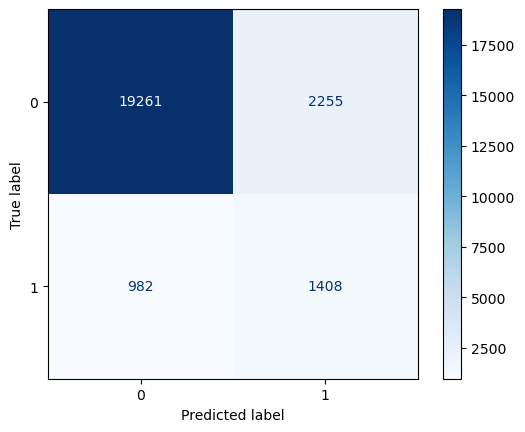

In [214]:
# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#results are good, so we can use in the logistic regression features that are highlughted as importantin this model
#results could be be even better if we allow trees to be deeper, but I limited depth to 10 to avoid overfit. Also, actual results
#are not really important here, as we only need to understand which features should be used in regression.

In [215]:
feature_importances = best_clf.feature_importances_

In [216]:
feature_importances_df = pd.DataFrame({'features' : list(X),
                                      'feature_importances' : feature_importances}).sort_values(by='feature_importances', ascending=False)

In [217]:
# dealer name and company has little to no impact, so it will be excluded from the analysis to avoid overfitting.
feature_importances_df.head(50)

,features,feature_importances
0,Price,0.133000
1,Annual_Income,0.131966
19,Color_Red,0.022489
17,Color_Black,0.020365
18,Color_Pale White,0.020012
5,Engine_Single_manual,0.018941
4,Engine_Double_auto,0.018539
9,Body_Style_SUV,0.018293
16,City_Ventspils,0.018157
14,City_Riga,0.017909


In [248]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(best_clf, check_additivity=False)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Plot summary plot for feature importance
shap.summary_plot(shap_values[1], X, plot_type="bar")


TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

In [ ]:
### building logistic regression

In [218]:
### creating dummies for regression (keeping one value as a base case for all variables)
X = insurance[['Price', 'Annual_Income', 'Gender', 'Engine' , 'City', 'Color', 'Body_Style']]
X = pd.get_dummies(X, drop_first=True)
y = insurance['Claimed']
scaler = StandardScaler()
X[['Price', 'Annual_Income']] = scaler.fit_transform(X[['Price', 'Annual_Income']])
X

,Price,Annual_Income,Gender_Male,Engine_Single_manual,City_Jelgava,City_Liepaja,City_Riga,City_Tukums,City_Ventspils,Color_Pale White,Color_Red,Body_Style_Hatchback,Body_Style_Passenger,Body_Style_SUV,Body_Style_Sedan
Car_id,,,,,,,,,,,,,,,
C_CND_000001,-0.141344,-1.135209,True,False,False,False,True,False,False,False,False,False,False,True,False
C_CND_000002,-0.614689,0.901622,True,False,False,True,False,False,False,False,False,False,False,True,False
C_CND_000003,0.230570,0.283559,True,True,False,False,True,False,False,False,True,False,True,False,False
C_CND_000004,-0.952792,-1.135209,True,True,True,False,False,False,False,True,False,False,False,True,False
C_CND_000005,-0.242775,0.880788,True,False,False,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_CND_023902,-1.088033,-1.135209,True,True,False,False,False,True,False,False,True,False,True,False,False
C_CND_023903,-0.817551,0.096056,False,False,False,True,False,False,False,False,False,False,False,False,False
C_CND_023904,-0.479447,-0.174780,True,True,False,True,False,False,False,False,True,False,False,False,True


Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.54      0.68     21516
           1       0.11      0.51      0.18      2390

    accuracy                           0.53     23906
   macro avg       0.51      0.52      0.43     23906
weighted avg       0.83      0.53      0.63     23906

Confusion Matrix:


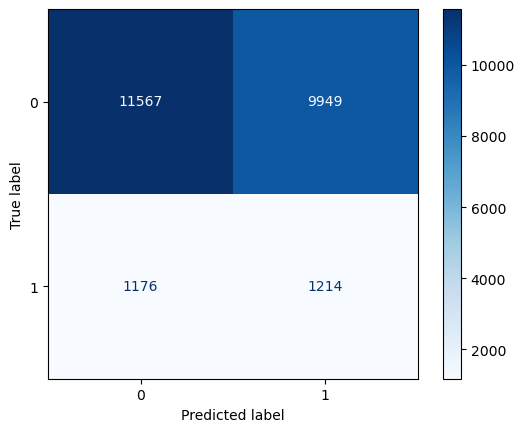

Logistic Regression Coefficients:
                      Coefficient
Price                    0.010071
Annual_Income            0.011045
Gender_Male              0.011326
Engine_Single_manual     0.070368
City_Jelgava             0.009754
City_Liepaja            -0.017271
City_Riga               -0.101051
City_Tukums              0.073663
City_Ventspils           0.015092
Color_Pale White         0.030367
Color_Red                0.147287
Body_Style_Hatchback     0.012558
Body_Style_Passenger    -0.006888
Body_Style_SUV          -0.033572
Body_Style_Sedan         0.030341


In [219]:
# Train a Logistic Regression model with increased weight for the positive class
logreg = LogisticRegression(class_weight={0: 1, 1: 9})
logreg.fit(X, y)
# Predict on the test set
y_pred = logreg.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Display the coefficients
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=['Coefficient'])
print("Logistic Regression Coefficients:")
print(coefficients)

In [202]:
# Add predicted probabilities to the initial DataFrame
insurance['Predicted_Prob_Class_0'] = y_pred_prob[:, 0]
insurance['Predicted_Prob_Class_1'] = y_pred_prob[:, 1]

In [203]:
insurance.sort_values(by='Predicted_Prob_Class_1')

,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Color,Price,Dealer_No,Body_Style,Phone,Amount_paid_for_insurance,Claimed,City,Car,Predicted_Prob_Class_0,Predicted_Prob_Class_1
Car_id,,,,,,,,,,,,,,,,,,,
C_CND_018567,09/19/2023,Shayan,Female,13500,Saab-Belle Dodge,Ford,Taurus,Double_auto,Black,12000,60504-7114,SUV,8858286,646,0,Riga,Ford Taurus,0.534368,0.465632
C_CND_013475,05/07/2023,Edwin,Female,13500,Race Car Help,Audi,A6,Double_auto,Black,14000,78758-7841,SUV,6016734,1128,0,Riga,Audi A6,0.534030,0.465970
C_CND_004609,08/13/2022,Eloise,Female,13500,U-Haul CO,Mercury,Grand Marquis,Double_auto,Black,19000,78758-7841,SUV,6546907,1367,0,Riga,Mercury Grand Marquis,0.533185,0.466815
C_CND_023725,12/29/2023,Sara,Female,506000,Motor Vehicle Branch Office,Plymouth,Neon,Double_auto,Black,9000,78758-7841,SUV,7183383,828,0,Riga,Plymouth Neon,0.533023,0.466977
C_CND_020378,11/05/2023,Tristan,Female,13500,Clay Johnson Auto Sales,Acura,RL,Double_auto,Black,24001,78758-7841,SUV,8734133,1379,0,Riga,Acura RL,0.532340,0.467660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_CND_004235,07/30/2022,Nana,Male,2570000,Scrivener Performance Engineering,Volvo,S40,Single_manual,Red,22000,38701-8047,Sedan,7877016,1425,0,Tukums,Volvo S40,0.407086,0.592914
C_CND_022408,12/05/2023,Josh,Male,6600000,Scrivener Performance Engineering,Mercury,Sable,Double_auto,Red,39000,38701-8047,Sedan,6307543,2168,1,Tukums,Mercury Sable,0.406588,0.593412
C_CND_003793,07/09/2022,Penelope,Male,1802100,Tri-State Mack Inc,Mercedes-B,SLK230,Single_manual,Red,71210,85257-3102,Hatchback,8414777,3735,0,Tukums,Mercedes-B SLK230,0.406167,0.593833


In [ ]:
### seems that logistic regression can't capture any patterns in this dataset. Even if it rebalanced in only gives 0.53 accuracy score. 
#So, returning to Decision Tree Classifier 
### and trying yo find patterns based on the split criteria

In [242]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [243]:
clf.score(X, y)

0.9003179118213

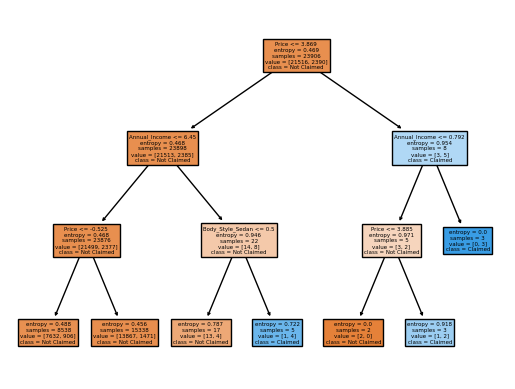

In [244]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Not Claimed', 'Claimed'],
               filled=True)
plt.show()